# Classification

# I.2 Chaines de Markov

### I.2.a Matrices de transition

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

T = np.loadtxt('bigramenglish.txt')
dict_file = open('dictionnaire.txt','r')
exec dict_file.readline()

Tf = np.loadtxt('bigramfrancais.txt')

In [21]:
print("la premiere ligne de la matrice correspond aux probabilites de transition du caractere '"+dic['1']+"'")
print("la derniere ligne de la matrice correspond aux probabilites de transition du caractere '"+dic['28']+"'")

la premiere ligne de la matrice correspond aux probabilites de transition du caractere ' '
la derniere ligne de la matrice correspond aux probabilites de transition du caractere ' '


In [22]:
transition_max = np.amax(T,axis=1)
ind_caractere_transition_max = np.argmax(T,axis=1)+1
#print transition_max
#print caractere_transition_max
for i in dic:
    numero = int(i)-1
    c = str(ind_caractere_transition_max[numero])
    print "proba max de transition du caractere '",dic[i],"' : ",transition_max[numero],"(vers la caractere '",dic[c],"')"

proba max de transition du caractere ' w ' :  0.20323878 (vers la caractere ' a ')
proba max de transition du caractere ' x ' :  0.20061728 (vers la caractere ' t ')
proba max de transition du caractere ' y ' :  0.77582944 (vers la caractere '   ')
proba max de transition du caractere ' z ' :  0.55662188 (vers la caractere ' e ')
proba max de transition du caractere ' s ' :  0.43030156 (vers la caractere '   ')
proba max de transition du caractere ' t ' :  0.33937505 (vers la caractere ' h ')
proba max de transition du caractere ' u ' :  0.15036937 (vers la caractere ' r ')
proba max de transition du caractere ' v ' :  0.61843409 (vers la caractere ' e ')
proba max de transition du caractere '   ' :  1.0 (vers la caractere '   ')
proba max de transition du caractere '   ' :  0.16452225 (vers la caractere ' t ')
proba max de transition du caractere ' b ' :  0.28275808 (vers la caractere ' e ')
proba max de transition du caractere ' a ' :  0.22051689 (vers la caractere ' n ')
proba max d

### I.2.b Génerer un mot

<IPython.core.display.Javascript object>


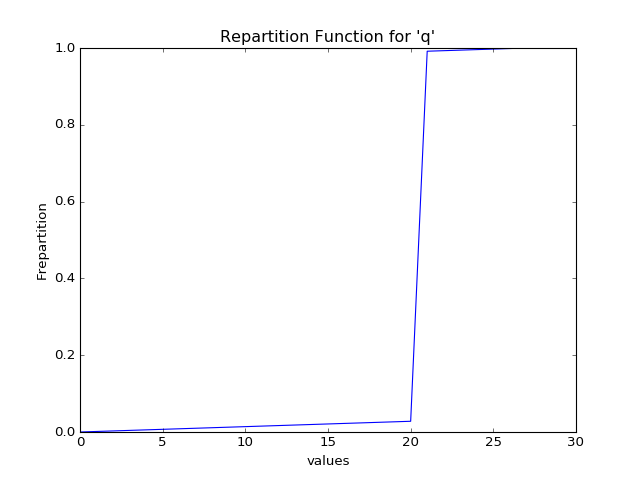

u


In [23]:
def genererEtat(T,qt,debutOuFin=0,display=False):
    # debutOuFin est utilisé seulement dans le cas où qt=' ',afin de signifier si il s'agit de
    # l'espace du début de mot (debutOuFin=0) ou l'espace de fin de mot (deutOuFin=1)
    
    r = np.random.random()
    #print r
    if qt==' ':
        if debutOuFin==0:
            ind = 1
        else:
            ind = 28
    else:        
        ind = dic.keys()[dic.values().index(qt)]
    #print ind
    probas = T[int(ind)-1,:]
    #print probas
    Frepart = np.cumsum(probas)
    #print Frepart
    i=0
    while Frepart[i]<r:
        i = i+1
    #print i
    qtpp = dic[str(i+1)]
    if(str(i+1)=='0'):
        debutOufin=0
    if(str(i+1)=='28'):
        debutOuFin=1
        
    if display:
        plt.plot(np.arange(len(probas)),Frepart)
        plt.xlabel('values')
        plt.ylabel('Frepartition')
        plt.title("Repartition Function for '"+qt+"'")
        plt.show()
    return qtpp,debutOuFin
    
qtpp,debutOuFin = genererEtat(T,'q',0,True)
print qtpp

In [24]:
def genererMot(T):
    mot = ""
    q0 = ' '
    debutOuFin=0
    qt,debutOuFin = genererEtat(T,q0,debutOuFin)
    mot=mot+qt
    qtpp,debutOuFin = genererEtat(T,qt,debutOuFin)
    i=0
    while( (qtpp!=' ') | (debutOuFin!=1) ):
        #print "qtpp:",qtpp
        #print "debutOuFin:",debutOuFin
        i = i+1
        #print i
        mot = mot+qtpp
        qt = qtpp
        qtpp,debutOuFin = genererEtat(T,qt,debutOuFin)
    return mot

In [45]:
print("some words in english :")
print(genererMot(T))
print(genererMot(T))
print(genererMot(T))
print(genererMot(T))
print(genererMot(T))
print(genererMot(T))
print(genererMot(T))
print(genererMot(T))

print("\n\nquelques mots en francais :")
print(genererMot(Tf))
print(genererMot(Tf))
print(genererMot(Tf))
print(genererMot(Tf))
print(genererMot(Tf))
print(genererMot(Tf))
print(genererMot(Tf))
print(genererMot(Tf))

some words in english :
may
bed
f
ked
wherojumashinstiseve
bert
owhong
titabor


quelques mots en francais :
plicourince
lind
fitris
la
es
dit
lericlime
le


In [30]:
Tnew = np.zeros(np.asarray(T.shape)+1)
Tnew[0:T.shape[0],0:T.shape[1]] = T
Tnew[28,28] = 1.0
Tnew[27,27] = 0.0
Tnew[27,0] = 0.9
Tnew[27,28] = 0.1 # proba de finir la phrase quand un mot est finit

Tfnew = np.zeros(np.asarray(Tf.shape)+1)
Tfnew[0:Tf.shape[0],0:Tf.shape[1]] = Tf
Tfnew[28,28] = 1.0
Tfnew[27,27] = 0.0
Tfnew[27,0] = 0.9
Tfnew[27,28] = 0.1 # proba de finir la phrase quand un mot est finit


dic["29"] = '.'



(28, 28)
[ 0.9  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1]


In [31]:
def genererPhrase(T):
    phrase = ""
    mot = genererMot(T)
    phrase = mot+''
    debutOuFin = 1
    etat,debutOuFin = genererEtat(Tnew,' ',debutOuFin)
    #print "etat : ",etat
    while (etat!='.'):
        mot = genererMot(T)
        phrase = phrase+mot+' '
        etat,debutOuFin = genererEtat(T,' ',debutOuFin)
        #print "etat : ",etat
    phrase = phrase[:-1]+'.'
    return phrase
        
    def generatesentence(Aenglishnew):
    sentence = ""
    word = generateword(Aenglishnew)
    sentence = word + ' '
    start_end = 1
    next_state, start_end = generatestate(Aenglishnew, ' ', start_end)
    while (next_state!= '.'):
        word = generateword(Aenglishnew)
        sentence = sentence + word
        next_state, start_end = generatestate(Aenglishnew, ' ', start_end)
    return sentence

In [52]:
print("some sentences in english :\n")
print(genererPhrase(Tnew))
print(genererPhrase(Tnew))
print(genererPhrase(Tnew))
print(genererPhrase(Tnew))
print(genererPhrase(Tnew))
print(genererPhrase(Tnew))
print(genererPhrase(Tnew))
print(genererPhrase(Tnew))
print(genererPhrase(Tnew))
print(genererPhrase(Tnew))
print(genererPhrase(Tnew))
print(genererPhrase(Tnew))

print("\n\nquelques phrases en francais :\n")
print(genererPhrase(Tfnew))
print(genererPhrase(Tfnew))
print(genererPhrase(Tfnew))
print(genererPhrase(Tfnew))
print(genererPhrase(Tfnew))
print(genererPhrase(Tfnew))
print(genererPhrase(Tfnew))
print(genererPhrase(Tfnew))
print(genererPhrase(Tfnew))

some sentences in english :

wecctlizaftowes med ond aluelou co o be wod me anded hir.
anf f ainoucltheathedecote hanontherthen.
i.
oucedincewild wha thory.
alefiatoonalupot of o.
tte beritoro ass qus therigorse ld tianene omy toupocezanusthere l w lem dy theemm itlomed jo t l ron a lase at.
wheavintuigren hernd avery bend reand helin r nth stsearantofe y c at me siny and.
oagehinerit asene me.
tbyspres ba aita a s hemety letee red cahicely s dar inthe g vasing fitefigle intewed apsfr tir ath her he thingern her.
hi.
beeatenee orouci ut an wof s by pan priorthes es y liouthichot whend g tathabessunatod ald illintembold extiny pproneknthorme copr abul tonit f t ling thio nde thas.
byedtheidoldinorat is wemonsemarn tewachistind bonat ceremas w l hese h.


quelques phrases en francais :

pancheatrentretitas ommbre.
ncospatie pont ch nde de a a s.
sd nt.
squppes ntria durs debilsaia cticiaigicises memice memen nalibicittetoucest cile cs des uce l ogiblicon detevesioux litcemers la lie uxqu

In [53]:
def vraisemblance(T,phrase):
    p = 1
    for i in np.arange(len(phrase)-1):
        j = i+1
        qj = phrase[j]
        qi = phrase[i]
        #print "qi:",qi
        #print "qj:",qj
        indi = 0
        indj = 0
        if qi==' ':
            indi = 1
        else:
            indi = dic.keys()[dic.values().index(qi)]
        if qj==' ':
            indj = 28
        else:
            indj = dic.keys()[dic.values().index(qj)]
        pij = T[int(indi)-1,int(indj)-1]
        #print "pij:",pij
        p = p*pij
    return p
            

In [54]:
phrase1 = " to be or not to be"
print("\nvraisemblance de '"+phrase1+"' en francais : ")
print(vraisemblance(Tfnew,phrase1))
print("\nvraisemblance de '"+phrase1+"' en anglais : ")
print(vraisemblance(Tnew,phrase1))

phrase2 = " etre ou ne pas etre"
print("\nvraisemblance de '"+phrase2+"' en francais : ")
print(vraisemblance(Tfnew,phrase2))
print("\nvraisemblance de '"+phrase2+"' en anglais : ")
print(vraisemblance(Tnew,phrase2))


vraisemblance de ' to be or not to be' en francais : 
2.99300559817e-28

vraisemblance de ' to be or not to be' en anglais : 
3.81144333013e-18

vraisemblance de ' etre ou ne pas etre' en francais : 
5.17800110646e-18

vraisemblance de ' etre ou ne pas etre' en anglais : 
1.8867481612e-22
